In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading the Input Dataset

In [74]:
loan_data = pd.read_csv("loan.csv", header =0)

C:\Users\simpl\AppData\Local\Temp\ipykernel_7304\1189485191.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("loan.csv", header =0)


In [75]:
loan_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Finding columns with missing values percentage

In [76]:
len(loan_data)

39717

In [189]:
miss_col_Pct = miss_col_Pct[100*(loan_data.isna().sum() / len(loan_data.index)) > 99]

In [190]:
miss_col_Pct.head(60)

mths_since_last_major_derog       True
annual_inc_joint                  True
dti_joint                         True
verification_status_joint         True
tot_coll_amt                      True
tot_cur_bal                       True
open_acc_6m                       True
open_il_6m                        True
open_il_12m                       True
open_il_24m                       True
mths_since_rcnt_il                True
total_bal_il                      True
il_util                           True
open_rv_12m                       True
open_rv_24m                       True
max_bal_bc                        True
all_util                          True
total_rev_hi_lim                  True
inq_fi                            True
total_cu_tl                       True
inq_last_12m                      True
acc_open_past_24mths              True
avg_cur_bal                       True
bc_open_to_buy                    True
bc_util                           True
mo_sin_old_il_acct       

In [79]:
# Columns with 100% missing values
miss_col_Pct.shape

(54,)

In [80]:
# Removing those columns with 100% missing values

loan_data_v1 = loan_data.drop(['mths_since_last_major_derog','annual_inc_joint','dti_joint',
'verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m',
'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim',
'inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq',
'mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl',
'num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m',
'num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim',
'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'], axis=1)
loan_data_v1

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [81]:
#Column wise unique values 
unq_col_pct = loan_data_v1.apply(pd.Series.nunique)
unq_col_pct.sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
pymnt_plan                     1
initial_list_status            1
term                           2
next_pymnt_d                   2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
dtype: int64

In [82]:
loan_data_v2 = loan_data_v1.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type',
'policy_code','collections_12_mths_ex_med','pymnt_plan','initial_list_status','next_pymnt_d'], axis=1)
loan_data_v2

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


In [83]:
loan_data_v2.shape

(39717, 47)

In [84]:
# Transformimng columns with % signs - removing trailing percentage signs

def remove_perc(x):
    return float(str(x).replace('%',''))

In [85]:
loan_data_v2.int_rate = loan_data_v2.int_rate.apply(remove_perc)
loan_data_v2.revol_util = loan_data_v2.revol_util.apply(remove_perc)

In [86]:
loan_data_v2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [87]:
loan_data_v2.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_reco

### More Data cleaning - tranforming object data types into meaningful data types

In [88]:
loan_data_v2.term = loan_data_v2.term.apply(lambda x: (str(x)[:3]))

In [89]:
loan_data_v2

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


In [94]:
#Drop few more fields not relevant for data analysis
loan_data_v3 = loan_data_v2.drop(['emp_title','url','desc','title'], axis=1)
loan_data_v3

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN


### Data analysis part

In [97]:
# Defining a function to create a Charge-off flag variable
def CO_Categ(loan_sts):
    if(loan_sts == 'Charged Off'):
        return 1
    else:
        return 0

In [98]:
loan_data_v3['CO_Flag']=loan_data_v3['loan_status'].apply(CO_Categ)

In [100]:
loan_data_v3.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,CO_Flag
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0


In [101]:
#Loan distribution by different variables

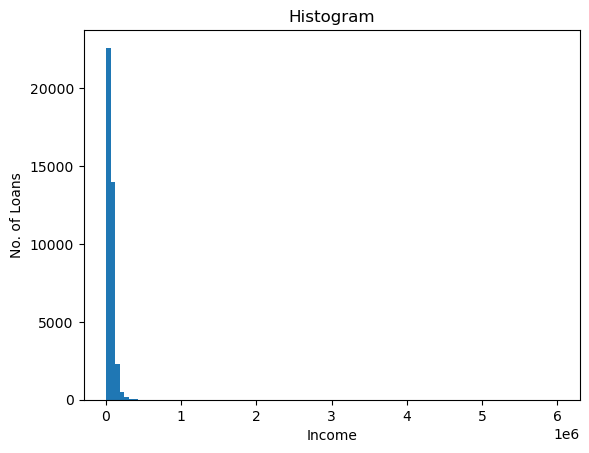

In [103]:
num_bins = 100

plt.hist(loan_data_v3.annual_inc, num_bins)

plt.xlabel("Income")
plt.ylabel("No. of Loans")

plt.title("Histogram")

#plt.legend()

plt.show()

In [104]:
loan_data_v3.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [115]:
#loan_data_v3.annual_inc.quantile(0.90)
#loan_data_v3.annual_inc.quantile(0.95)
#loan_data_v3.annual_inc.quantile(0.96)
#loan_data_v3.annual_inc.quantile(0.97)
#loan_data_v3.annual_inc.quantile(0.98)
loan_data_v3.annual_inc.quantile(0.75)

82300.0

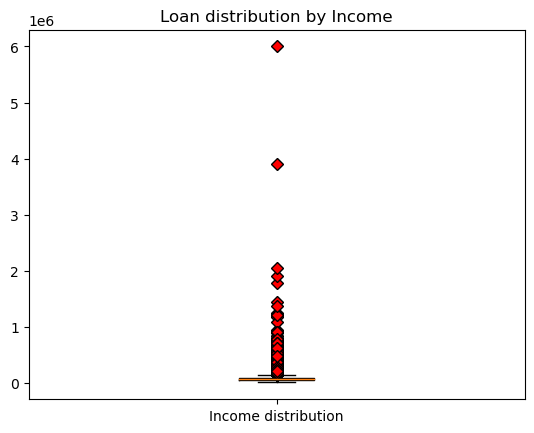

In [116]:
data1 = loan_data_v3[['annual_inc']]

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# set title
plt.title('Loan distribution by Income')

# make the boxplot
plt.boxplot(data1.values, labels=['Income distribution'], flierprops=red_diamond);

In [117]:
#removing records with extemely high incomes >$250k
Income_LT_250000 = loan_data_v3[(loan_data_v3['annual_inc'] <= 250000)]

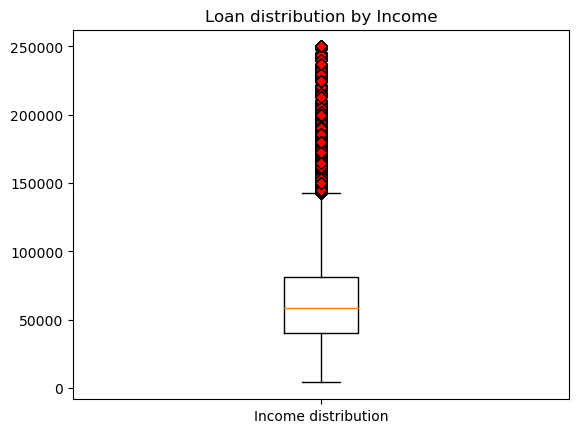

In [118]:
data2 = Income_LT_250000[['annual_inc']]

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# set title
plt.title('Loan distribution by Income')

# make the boxplot
plt.boxplot(data2.values, labels=['Income distribution'], flierprops=red_diamond);

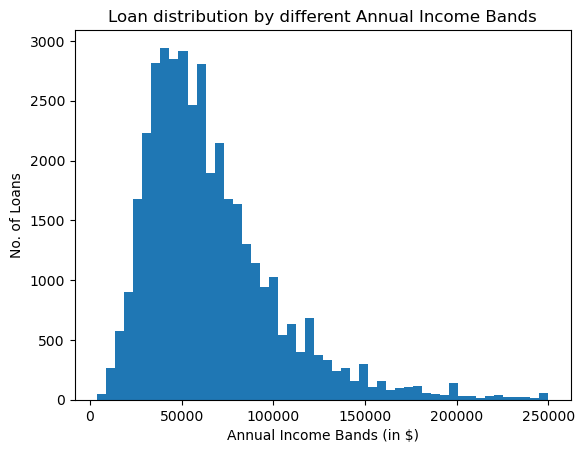

In [184]:
num_bins = 50

plt.hist(Income_LT_250000.annual_inc, num_bins)

plt.xlabel("Annual Income Bands (in $)")
plt.ylabel("No. of Loans")

plt.title("Loan distribution by different Annual Income Bands")

#plt.legend()

plt.show()

In [128]:
# Defining a function to create a flag variable
def Income_Categ(x):
    if(x <= 25000):
        return "1.<=25k"
    elif(x <= 50000):
        return "2.25k-50k"
    elif(x <= 75000):
        return "3.50k-75k"
    elif(x <= 100000):
        return "4.75k-100k"
    elif(x <= 125000):
        return "5.100k-125k"
    elif(x <= 150000):
        return "6.125k-150k"
    else:
        return "7.>150k"

In [129]:
loan_data_v3['Income_Group']=loan_data_v3['annual_inc'].apply(Income_Categ)
loan_data_v3.Income_Group.value_counts()

2.25k-50k      13168
3.50k-75k      12027
4.75k-100k      6259
5.100k-125k     2785
1.<=25k         2576
7.>150k         1551
6.125k-150k     1351
Name: Income_Group, dtype: int64

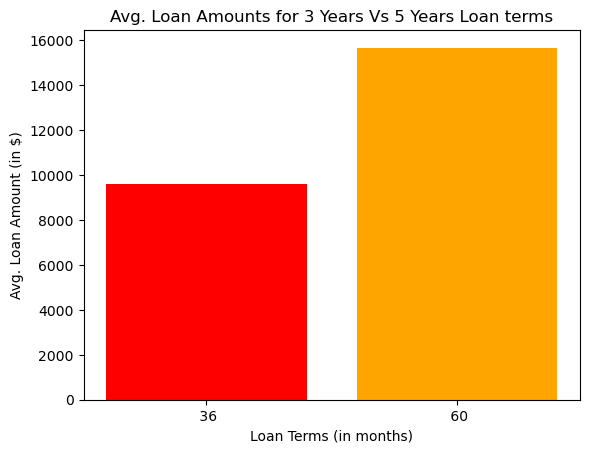

In [185]:
# Avg loan amounts by Loan tenure
Avg_Loan_by_Term = loan_data_v3.groupby('term').loan_amnt.mean()

# sort by sales
Avg_Loan_by_Term.sort_values(inplace=True)

x = Avg_Loan_by_Term.index.tolist()
y = Avg_Loan_by_Term.values.tolist()

# set axis labels
plt.xlabel('Loan Terms (in months)')
plt.ylabel('Avg. Loan Amount (in $)')

# set title
plt.title('Avg. Loan Amounts for 3 Years Vs 5 Years Loan terms')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.bar(x, y, color=['red', 'orange'])
plt.show()

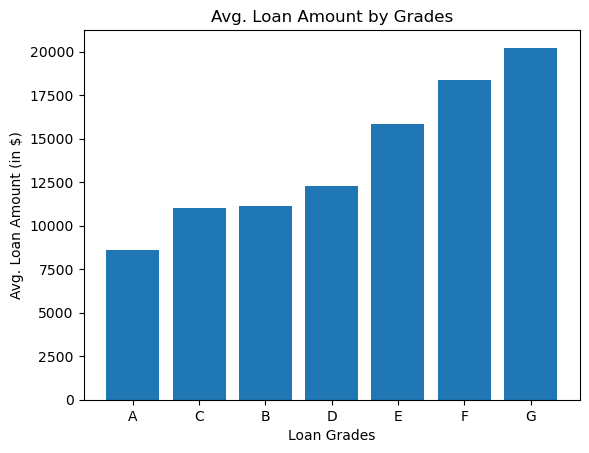

In [186]:
# Avg Loan amount by grade
Avg_Loan_by_grade = loan_data_v3.groupby('grade').loan_amnt.mean()

# sort by sales
Avg_Loan_by_grade.sort_values(inplace=True)

x = Avg_Loan_by_grade.index.tolist()
y = Avg_Loan_by_grade.values.tolist()

# set axis labels
plt.xlabel('Loan Grades')
plt.ylabel('Avg. Loan Amount (in $)')

# set title
plt.title('Avg. Loan Amount by Grades')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.bar(x, y)
plt.show()

In [ ]:
#Bi-variate analysis

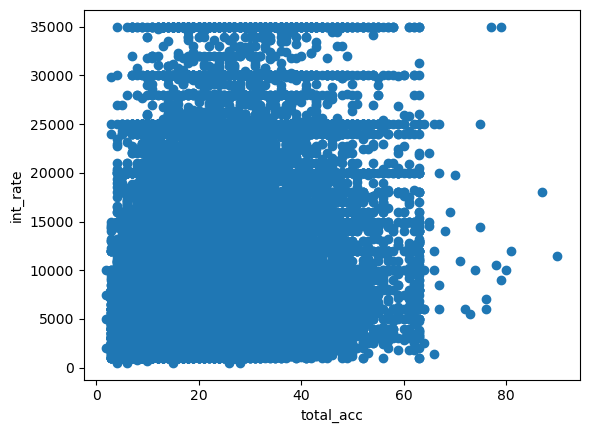

In [142]:
# set label of axes 
plt.xlabel('total_acc')
plt.ylabel('int_rate')

# plot
plt.scatter(loan_data_v3["total_acc"], loan_data_v3["loan_amnt"])
plt.show()

In [151]:
#loan_data_v3['Issue_Year'] = loan_data_v3['issue_d'])[]
loan_data_v3['issue_d'][:][:3]

0    Dec-11
1    Dec-11
2    Dec-11
Name: issue_d, dtype: object

In [ ]:
#Analyzing Charge-off rates by various other variables

In [155]:
loan_data_v3

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,CO_Flag,Income_Group
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0,1.<=25k
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,2.25k-50k
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0,1.<=25k
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0,2.25k-50k
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0,4.75k-100k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,0,5.100k-125k
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,0,1.<=25k
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN,0,4.75k-100k
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN,0,7.>150k


In [158]:
CO_RT_bygrade = loan_data_v3.groupby('grade').mean()
CO_RT_bygrade

C:\Users\simpl\AppData\Local\Temp\ipykernel_7304\1424215075.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CO_RT_bygrade = loan_data_v3.groupby('grade').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,CO_Flag
grade,,,,,,,,,,,,,,,,,,,,,
A,695132.169162,866162.003471,8624.928111,8402.421914,8155.229508,7.335262,256.757152,66648.847979,12.052141,0.044621,...,9008.823515,8740.354899,8144.953967,842.937910,0.543738,20.387912,3.023844,1944.033577,0.012873,0.059693
B,685231.132779,853223.287687,11119.080699,10861.335275,10327.162203,11.021224,321.024384,67639.958014,13.430587,0.115225,...,11961.068098,11392.483319,10043.959324,1857.422361,1.002424,58.684082,6.692019,2673.273910,0.044789,0.118552
C,658180.856508,816873.480119,11004.670906,10779.263398,10051.275649,13.552960,319.675054,67939.195952,13.890301,0.186219,...,12018.054169,11241.514192,9546.577267,2366.342801,1.738885,103.395343,15.563399,2569.731719,0.058876,0.166337
D,671556.251366,835944.677784,12278.198606,12069.789900,11381.815858,15.719900,363.892996,68524.874605,13.957618,0.246279,...,13584.562903,12893.022344,10301.583657,3140.296557,1.963486,140.719382,18.677531,2887.003797,0.057544,0.210665
E,705015.387051,879891.647431,15847.255454,15254.327938,14461.885999,17.711714,428.536566,77989.406921,14.094947,0.241379,...,17583.912931,16693.156752,12418.440781,4926.436956,2.576016,236.459178,28.453310,4148.670732,0.062700,0.251583
F,727162.748332,908615.548141,18363.298379,17688.417541,16891.627492,19.749323,498.653813,84602.272059,14.121544,0.337464,...,20415.496968,19506.622507,13403.096416,6549.730734,3.180148,459.489675,55.865587,4627.515081,0.069632,0.304099
G,711136.056962,891404.579114,20226.819620,19828.639241,18857.510145,21.401044,574.744905,94386.473133,14.010854,0.408228,...,23017.580311,22047.097658,15064.680222,7528.055095,4.567769,420.277152,54.362746,5951.916203,0.057325,0.319620


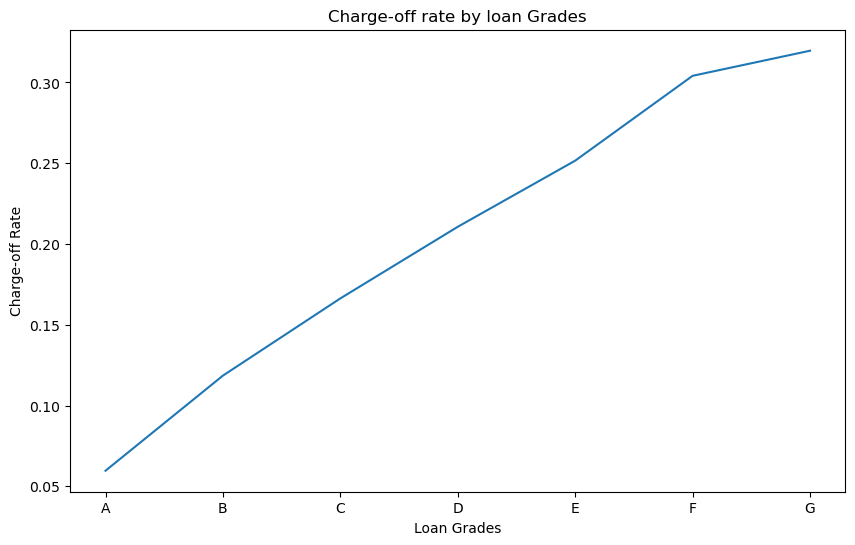

In [187]:
CO_RT_bygrade = loan_data_v3.groupby('grade').CO_Flag.mean()

x = CO_RT_bygrade.index.tolist()
y = CO_RT_bygrade.values.tolist()

# set figure size
plt.figure(figsize=(10, 6))

# set title
plt.title('Charge-off rate by loan Grades')

# set axis labels
plt.xlabel('Loan Grades')
plt.ylabel('Charge-off Rate')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.plot(x, y)

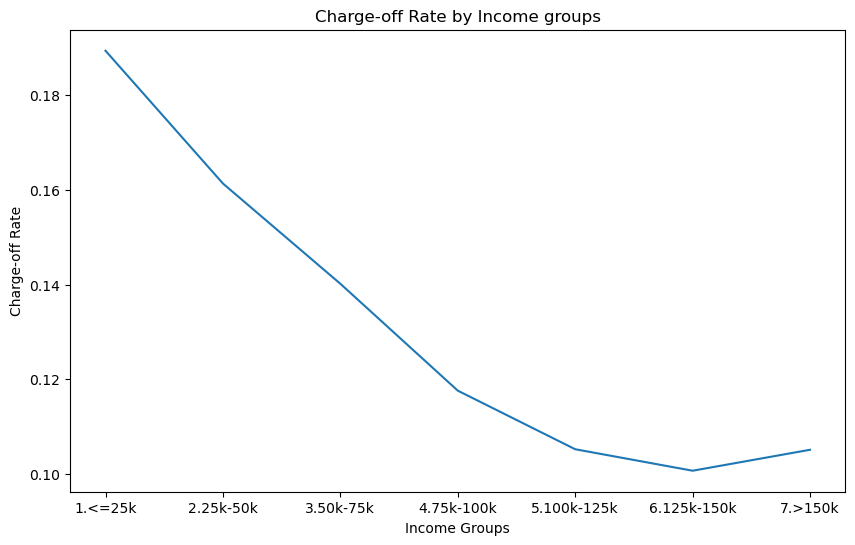

In [188]:
CO_RT_byincome = loan_data_v3.groupby('Income_Group').CO_Flag.mean()

x = CO_RT_byincome.index.tolist()
y = CO_RT_byincome.values.tolist()

# set figure size
plt.figure(figsize=(10, 6))

# set title
plt.title('Charge-off Rate by Income groups')

# set axis labels
plt.xlabel('Income Groups')
plt.ylabel('Charge-off Rate')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.plot(x, y)

In [164]:
# Fetching only Charge-off Accounts
CO_Accounts = loan_data_v3[(loan_data_v3['CO_Flag'] == 1)]
CO_Accounts

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,CO_Flag,Income_Group
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,1,2.25k-50k
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,...,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0,1,2.25k-50k
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,...,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0,1,1.<=25k
12,1064687,1298717,9000,9000,9000.0,36,13.49,305.38,C,C1,...,570.26,0.00,444.30,4.1600,Jul-12,305.38,Nov-12,0.0,1,2.25k-50k
14,1069057,1303503,10000,10000,10000.0,36,10.65,325.74,B,B2,...,1393.42,0.00,645.10,6.3145,Oct-13,325.74,Mar-14,0.0,1,4.75k-100k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118823,118026,2500,2500,675.0,36,12.80,84.00,D,D4,...,477.21,1.69,35.70,0.3800,Mar-10,1.76,May-16,NaN,1,2.25k-50k
39668,118533,117783,2500,2500,825.0,36,9.64,80.26,B,B4,...,354.44,1.36,0.00,0.0000,Mar-10,1.40,May-16,NaN,1,3.50k-75k
39669,118523,118519,6500,6500,225.0,36,15.01,225.37,F,F1,...,1168.14,0.00,0.00,0.0000,Feb-09,225.37,May-16,NaN,1,7.>150k
39678,113179,113093,1000,1000,950.0,36,10.59,32.55,C,C2,...,138.64,0.00,21.29,0.2300,May-09,32.55,Oct-09,NaN,1,2.25k-50k


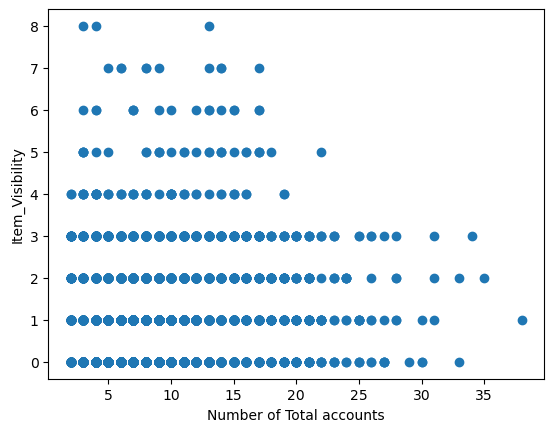

In [170]:
# set label of axes 
plt.xlabel('Number of Total accounts')
plt.ylabel('Item_Visibility')

# plot
plt.scatter(CO_Accounts["open_acc"], CO_Accounts["inq_last_6mths"])

In [171]:
loan_data_v3.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [172]:
CO_RT_by_Rev_Util = loan_data_v3.groupby('loan_status').revol_util.mean()
CO_RT_by_Rev_Util

loan_status
Charged Off    55.572110
Current        53.204482
Fully Paid     47.531801
Name: revol_util, dtype: float64

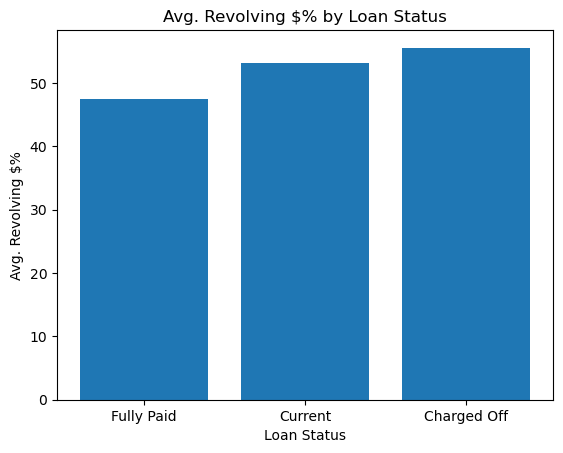

In [173]:
# sort by sales
CO_RT_by_Rev_Util.sort_values(inplace=True)

x = CO_RT_by_Rev_Util.index.tolist()
y = CO_RT_by_Rev_Util.values.tolist()

# set axis labels
plt.xlabel('Loan Status')
plt.ylabel('Avg. Revolving $%')

# set title
plt.title('Avg. Revolving $% by Loan Status')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.bar(x, y)
plt.show()

In [183]:
CO_Accounts.addr_state.value_counts()/len(CO_Accounts.index)*100
#CO_RT_by_State.sort_values(inplace=True)
#CO_RT_by_State

CA    19.992891
FL     8.956815
NY     8.796872
TX     5.615781
NJ     4.940466
GA     3.820864
IL     3.500977
PA     3.198863
VA     3.145548
MD     2.878976
MA     2.825662
OH     2.754576
WA     2.256975
AZ     2.185889
NC     2.025946
MO     2.025946
NV     1.919318
MI     1.830460
CO     1.741603
CT     1.670517
MN     1.439488
OR     1.261774
SC     1.172916
WI     1.119602
AL     0.959659
LA     0.941887
KY     0.799716
OK     0.710858
UT     0.710858
KS     0.550915
NM     0.533144
HI     0.497601
AR     0.479829
NH     0.444286
RI     0.444286
WV     0.373201
DC     0.266572
AK     0.266572
DE     0.213258
SD     0.213258
MT     0.195486
VT     0.106629
WY     0.071086
NE     0.053314
MS     0.035543
TN     0.035543
ID     0.017771
Name: addr_state, dtype: float64